### De imports

In [1]:
import multiprocessing
import matplotlib.pyplot as plt
import timeit

### merge_sort
In deze functie word de ingevoerde lijst van getallen in twee gesplitst en daarna wordt de merge_lists functie op die twee halve lijsten aangeroepen. Meer over de merge_lists functie hieronder.

In [2]:
def merge_sort(lijst):
    if len(lijst) <= 1:
        return lijst
    else: 
        midden = int(len(lijst)/2)
        links = merge_sort(lijst[:midden])
        rechts = merge_sort(lijst[midden:])
        
    return merge_lists(links, rechts)

### merge_lists
Hier worden de lijsten gesorteerd, ...

In [3]:
def merge_lists(links,rechts):
    l = 0 # teller voor linker helft, daarom l gekozen
    r = 0 # teller voor rechts
    resultaat = []
    while l < len(links) and r < len(rechts):
        if links[l] <= rechts[r]:
            resultaat.append(links[l])
            l += 1
        else:
            resultaat.append(rechts[r])
            r += 1
            
    resultaat += links[l:]
    resultaat += rechts[r:]
    return resultaat

### De output
Hier wordt de merge_sort functie aangeroepen met als parameter de lijst van getallen, ook wordt hier de output weergegeven.

In [4]:
lijst = [24, 8, 15, 3, 38, 12, 11, 7]
print(merge_sort(lijst))

[3, 7, 8, 11, 12, 15, 24, 38]


### Test
Hier test ik of het merge sort algoritme het goed gesorteerd heeft, dat doe ik door het te vergelijken met de ingebouwde sorteer functie van Python.

In [5]:
sorted(lijst) == merge_sort(lijst)

True

### Threads
Hier worden de functies van hierboven uitgevoerd door verschillende hoeveelheden threads, met als doel om te zien of er veel verschil in de run time zit

In [6]:
threads = [1,2,4,8,16]

for thread_count in threads:
    pool = multiprocessing.Pool(thread_count)
    print(pool)
    
    results = [pool.apply_async(merge_sort(lijst))]
    print(results)
    %timeit merge_sort(lijst)

<multiprocessing.pool.Pool state=RUN pool_size=1>
9.13 µs ± 134 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=2>
9.08 µs ± 156 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=4>
9.35 µs ± 160 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=8>
9.13 µs ± 191 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
<multiprocessing.pool.Pool state=RUN pool_size=16>
9.24 µs ± 131 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Grafiek
hier is een grafiek gemaakt met als invoer de tijden van de test hierboven, ik heb getallen ingevuld die ik als uitslag krijg toen in het runde, deze getallen verschillen elke keer, daarom is deze grafiek niet altijd correct.

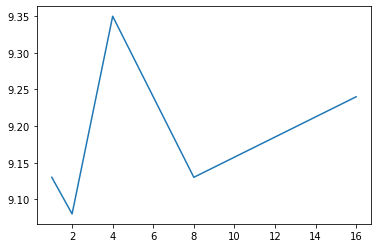

In [7]:
plt.plot([1,2,4,8,16], [9.13, 9.08, 9.35, 9.13, 9.24])

### Conclusie 
Het maakt weinig verschil in hoeveel threads je gebruikt bij deze opdracht, de verschillen zijn zo klein dat het niet te merken is voor de mens. Deze uitkomst vond ik erg apart, ik had namelijk verwacht dat 2 keer de kracht 2 keer zo snel zou gaan, niet dus. Daarom heb ik wat onderzoek gaan doen en ben ik deze video tegengekomen: https://www.youtube.com/watch?v=Obt-vMVdM8s.
In deze video wordt in de eerste 10 minuten veel uitgelegd over de GIL, na 10 minuten was ik mijn concentratie al weer kwijt en ging ik maar een website zoeken waar de GIL sneller en of beter wordt uitgelegd. Toen kwam ik op deze site: https://realpython.com/python-gil/. Daar blijkt al snel waarom de GIL is toegevoegd, namelijk voor memory management. Maar met die oplossing kwamen ook een paar nadelen, namelijk dat Python nu niet echt meer geschikt is om parallel taken uit te voeren